In [815]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
data = "data/Salesstore.csv"
df = pd.read_csv(data)
# df.head()
# df[df['Order_ID']==39364]

In [816]:
df.isnull().any()

Order_ID                False
Order_Priority          False
Order_Quantity          False
Sales                   False
Ship_Mode               False
Profit                  False
Customer_Name           False
Region                  False
Customer_Segment        False
Product_Category        False
Product_Sub-Category    False
Product_Name            False
Product_Container       False
dtype: bool

In [817]:
#check duplication

In [818]:
df.duplicated().any()

False

In [819]:
#check the data type of the dataFrame

In [820]:
print(df.dtypes)

Order_ID                  int64
Order_Priority           object
Order_Quantity            int64
Sales                   float64
Ship_Mode                object
Profit                  float64
Customer_Name            object
Region                   object
Customer_Segment         object
Product_Category         object
Product_Sub-Category     object
Product_Name             object
Product_Container        object
dtype: object


In [821]:
df.columns

Index(['Order_ID', 'Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode',
       'Profit', 'Customer_Name', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Name',
       'Product_Container'],
      dtype='object')

In [822]:
# Drop the Customer_Name column 

In [823]:
# df = df.drop('Customer_Name', axis=1)

### Data standarlizing

In [824]:
columns_to_capitalize = ['Order_Priority', 'Ship_Mode', 'Region', 'Customer_Segment',
       'Product_Category', 'Product_Sub-Category', 'Product_Name',
       'Product_Container']
df[columns_to_capitalize] = df[columns_to_capitalize].apply(lambda elm: elm.str.title())

## => What is the number of unique Order_priority?

In [825]:
nb_priority = df['Order_Priority'].nunique()
nb_priority

5

## => How many orders for each priority ?

In [826]:
nb_priority = df['Order_Priority'].value_counts()
nb_priority

Order_Priority
Not Specified    156
High             152
Low              147
Critical         147
Medium           128
Name: count, dtype: int64

### How many region there ?

In [827]:
regions = df['Region'].unique().tolist()
print(f"{len(regions)} :{regions}")

6 :['Nunavut', 'Northwest Territories', 'Atlantic', 'West', 'Ontario', 'Prarie']


### How many Customer_Segment are there?

In [828]:
segments = df['Customer_Segment'].unique().tolist()
print(f"{len(segments)} :{segments}")

4 :['Corporate', 'Consumer', 'Home Office', 'Small Business']


### How many Product_Catigorie exists?

In [829]:
products = df['Product_Category'].unique().tolist()
print(f"{len(products)} :{products}")

3 :['Office Supplies', 'Furniture', 'Technology']


### How many Product_Sub-Category are there?

In [830]:
sup_products = df['Product_Sub-Category'].nunique()
sup_products

15

In [831]:
sup_products = df['Product_Sub-Category'].unique().tolist()
sup_products

['Storage & Organization',
 'Office Furnishings',
 'Chairs & Chairmats',
 'Appliances',
 'Copiers And Fax',
 'Office Machines',
 'Tables',
 'Telephones And Communication',
 'Scissors, Rulers And Trimmers',
 'Labels',
 'Paper',
 'Binders And Binder Accessories',
 'Computer Peripherals',
 'Envelopes',
 'Pens & Art Supplies']

### what Product_Name sold the most?

In [832]:
product_quantity = df.groupby('Product_Name')['Order_Quantity'].sum().reset_index().sort_values(by = 'Order_Quantity', ascending=False)
product_quantity

,Product_Name,Order_Quantity
9,2160I,147
359,Ti 36X Solar Scientific Calculator,140
7,12-1/2 Diameter Round Wall Clock,134
400,Xerox 1920,129
344,T28 World,126
...,...,...
134,"Dot Matrix Printer Tape Reel Labels, White, 50...",1
279,Office Impressions Heavy Duty Welded Shelving ...,1
142,Eldon Cleatmat® Chair Mats For Medium Pile Car...,1
187,Gbc Docubind Tl200 Manual Binding Machine,1


### wich categorie had the highest/lowest profit?

In [833]:
category_profit = df.groupby('Product_Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending=False)
category_profit

,Product_Category,Profit
2,Technology,81368.05
1,Office Supplies,53073.95
0,Furniture,17017.84


### wich sub_categorie had the highest/lowest profit?

In [834]:
sub_category_profit = df.groupby('Product_Sub-Category')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending=False)
sub_category_profit

,Product_Sub-Category,Profit
14,Telephones And Communication,47992.17
8,Office Machines,26832.43
1,Binders And Binder Accessories,26291.74
0,Appliances,22731.86
2,Chairs & Chairmats,12164.94
7,Office Furnishings,8700.26
5,Envelopes,6049.97
3,Computer Peripherals,4982.06
9,Paper,3124.64
4,Copiers And Fax,1561.39


### what is the Customer_Segment that had a highest/lowest sales?

In [835]:
segment_hight_sales = df.groupby('Customer_Segment')['Sales'].sum().reset_index().sort_values(by = 'Sales', ascending=False)
segment_hight_sales

,Customer_Segment,Sales
1,Corporate,805343.1240
0,Consumer,186041.2210
2,Home Office,70363.1295
3,Small Business,35280.2125


### what is the Customer_Segment that had a highest/lowest profits?

In [836]:
segment_hight_profit = df.groupby('Customer_Segment')['Profit'].sum().reset_index().sort_values(by = 'Profit', ascending=False)
segment_hight_profit

,Customer_Segment,Profit
1,Corporate,120106.44
0,Consumer,18641.47
2,Home Office,11619.34
3,Small Business,1092.59


### how many times we have the same nomber of order_quantity (wich quantity is popular)?

In [837]:
popular_qnt = df.groupby('Order_Quantity').size().reset_index()
# popular_qnt = popular_qnt.rename(columns={'Order_Quantity': 'Order_Quantity', 0: 'freq'})
popular_qnt.columns=['Order_Quantity', 'freq']
popular_qnt = popular_qnt.sort_values(by = 'freq',ascending=False)
popular_qnt.head()

,Order_Quantity,freq
41,42,24
14,15,23
7,8,22
24,25,21
35,36,21


### how many customers belong to each segment?

In [838]:
customers_of_segment = df.groupby('Customer_Segment').count()
customers_of_segment

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Product_Category,Product_Sub-Category,Product_Name,Product_Container
Customer_Segment,,,,,,,,,,,,
Consumer,153,153,153,153,153,153,153,153,153,153,153,153
Corporate,518,518,518,518,518,518,518,518,518,518,518,518
Home Office,31,31,31,31,31,31,31,31,31,31,31,31
Small Business,28,28,28,28,28,28,28,28,28,28,28,28


In [839]:
segment_customers = df.groupby('Customer_Segment')['Order_ID'].nunique().reset_index()
segment_customers

,Customer_Segment,Order_ID
0,Consumer,126
1,Corporate,390
2,Home Office,30
3,Small Business,25


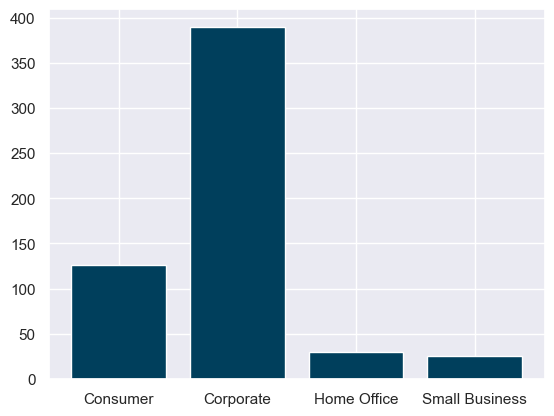

In [840]:
plt.bar(x=segment_customers['Customer_Segment'],height=segment_customers['Order_ID'],color = '#003f5c')
plt.show()

### what is the ranking of loyal customers?

In [841]:
order_id_counts = df['Order_ID'].value_counts().reset_index()
order_id_counts.columns = ['Order_ID', 'Frequency']
loyal_Cutomers_Ranking = pd.merge(order_id_counts, df[['Order_ID', 'Customer_Name']], on='Order_ID', how='left').drop_duplicates()
loyal_Cutomers_Ranking

,Order_ID,Frequency,Customer_Name
0,24132,6,Justin Knight
6,8995,4,Beth Paige
10,47846,4,Hilary Holden
14,32611,3,Neil Knudson
17,8992,3,Shahid Shariari
...,...,...,...
725,35908,1,Brad Eason
726,35584,1,Joel Jenkins
727,33255,1,Russell Applegate
728,28420,1,Bill Donatelli


### Identify Order_IDs with exceptionally high Profit and the common features among them. 

In [842]:
Hight_Order_ID_Profit = df.groupby('Order_ID')[['Profit','Order_Quantity']].sum().reset_index()
Hight_Order_ID_Profit.sort_values(by = 'Profit', ascending= False)

,Order_ID,Profit,Order_Quantity
374,39364,8416.24,44
201,21383,7416.43,31
291,30658,5965.11,79
390,41059,5459.88,71
127,12419,5322.14,12
...,...,...,...
418,44320,-1640.51,49
66,6116,-1759.58,6
397,41696,-2088.68,45
306,32199,-3161.58,41


In [843]:
# indexing the data Frame
df.set_index(['Region','Customer_Segment','Product_Category','Product_Sub-Category','Order_Priority','Order_ID','Ship_Mode'] , inplace= True)


In [844]:
df = df.sort_index()
df

Order_Quantity  \
Region   Customer_Segment Product_Category Product_Sub-Category         Order_Priority Order_ID Ship_Mode                     
Atlantic Consumer         Furniture        Office Furnishings           Critical       35558    Regular Air               2   
                                                                                       58055    Regular Air              26   
                                                                        Not Specified  21223    Regular Air               8   
                                           Tables                       Critical       53894    Regular Air              37   
                          Office Supplies  Appliances                   High           54304    Regular Air              11   
...                                                                                                                     ...   
West     Small Business   Office Supplies  Appliances                   Medium         31941    Express Air              32   
                                           Paper                        High           5504     Express Air               6   
                          Technology       Computer Peripherals         High           32871    Express Air              42   
                                           Telephones And Communication Critical       2720     Express Air              36   
                                                                                       54560    Express Air              45   

                                                                                                                Sales  \
Region   Customer_Segment Product_Category Product_Sub-Category         Order_Priority Order_ID Ship_Mode               
Atlantic Consumer         Furniture        Office Furnishings           Critical       35558    Regular Air    34.880   
                                                                                       58055    Regular Air   208.600   
                                                                        Not Specified  21223    Regular Air   435.290   
                                           Tables                       Critical       53894    Regular Air  2756.170   
                          Office Supplies  Appliances                   High           54304    Regular Air   558.620   
...                                                                                                               ...   
West     Small Business   Office Supplies  Appliances                   Medium         31941    Express Air  2564.450   
                                           Paper                        High           5504     Express Air    49.550   
                          Technology       Computer Peripherals         High           32871    Express Air   939.770   
                                           Telephones And Communication Critical       2720     Express Air  2051.016   
                                                                                       54560    Express Air  2404.599   

                                                                                                              Profit  \
Region   Customer_Segment Product_Category Product_Sub-Category         Order_Priority Order_ID Ship_Mode              
Atlantic Consumer         Furniture        Office Furnishings           Critical       35558    Regular Air   -22.12   
                                                                                       58055    Regular Air   -56.45   
                                                                        Not Specified  21223    Regular Air   122.41   
                                           Tables                       Critical       53894    Regular Air -1561.72   
                          Office Supplies  Appliances                   High           54304    Regular Air   118.32   
...                                        

In [845]:
region_avg_sales = df.groupby(level= 'Region')[['Sales','Order_Quantity','Profit']].mean()
region_avg_sales = region_avg_sales.sort_values(by = 'Sales')
region_avg_profit = region_avg_sales.sort_values(by = 'Profit')
region_avg_order_quantity = region_avg_sales.sort_values(by = 'Order_Quantity')

### what Region had the highest avg of sales and profit?

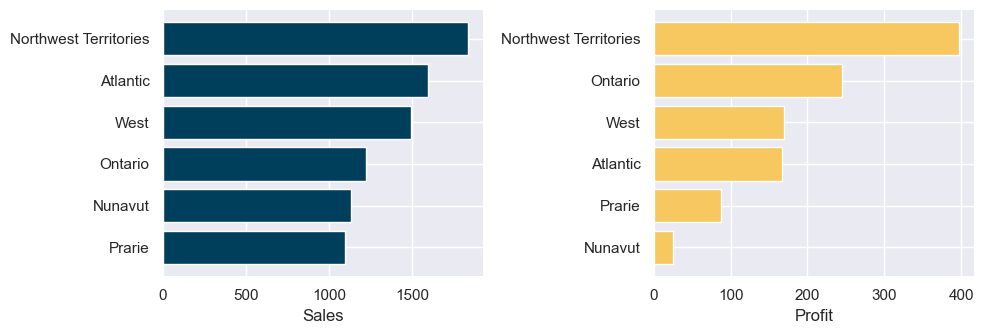

In [846]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3.5))

axs[0].barh(region_avg_sales.index, region_avg_sales['Sales'], color='#003f5c')
axs[0].set_xlabel('Sales')
axs[0].spines[['top', 'right', 'bottom', 'left']].set_visible(False)
axs[0].xaxis.set_ticks_position('none')

axs[1].barh(region_avg_profit.index, region_avg_profit['Profit'], color='#F6C85F')
axs[1].set_xlabel('Profit')
axs[1].spines[['top', 'right', 'bottom', 'left']].set_visible(False)

plt.tight_layout()
plt.show()

### The relationship between Sales and Profit : 

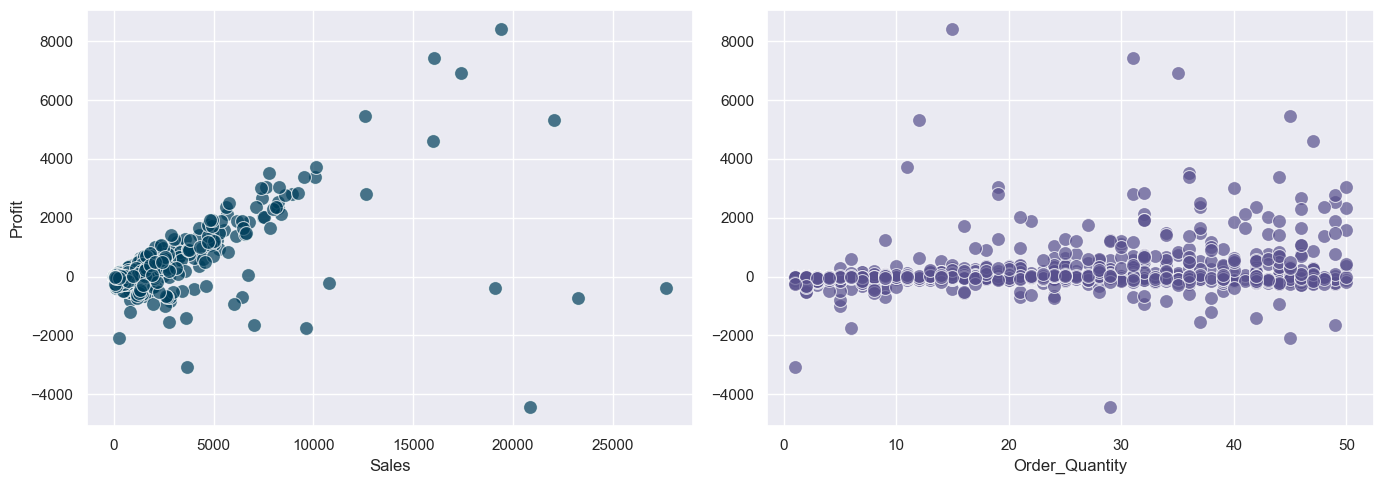

In [847]:
sns.set(style="darkgrid")
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(y='Profit',x='Sales' , data=df, color='#003f5c', alpha=0.7, s=100)
plt.xlabel('Sales')
plt.ylabel('Profit')

plt.subplot(1, 2, 2)
sns.scatterplot(y='Profit',x='Order_Quantity' , data=df, color='#58508d', alpha=0.7, s=100)
plt.xlabel('Order_Quantity')
plt.ylabel('')

plt.tight_layout()
plt.show()

### The proportion of Sales, Profit, And Order_Quantity for each Customer_Segment in each Region :

In [848]:
sales_sum_segment_region = df.groupby(level= ['Region','Customer_Segment'])[['Sales','Order_Quantity','Profit']].sum().reset_index()
# sales_sum_segment_region = avg_segment_region.sort_values(by = 'Sales', ascending=False)
sales_sum_segment_region.head()

,Region,Customer_Segment,Sales,Order_Quantity,Profit
0,Atlantic,Consumer,44459.2280,1103,2185.68
1,Atlantic,Corporate,191065.3360,3091,16399.41
2,Atlantic,Home Office,22196.9295,159,7191.46
3,Atlantic,Small Business,13483.6075,155,2616.73
4,Northwest Territories,Consumer,39093.3445,579,10358.28


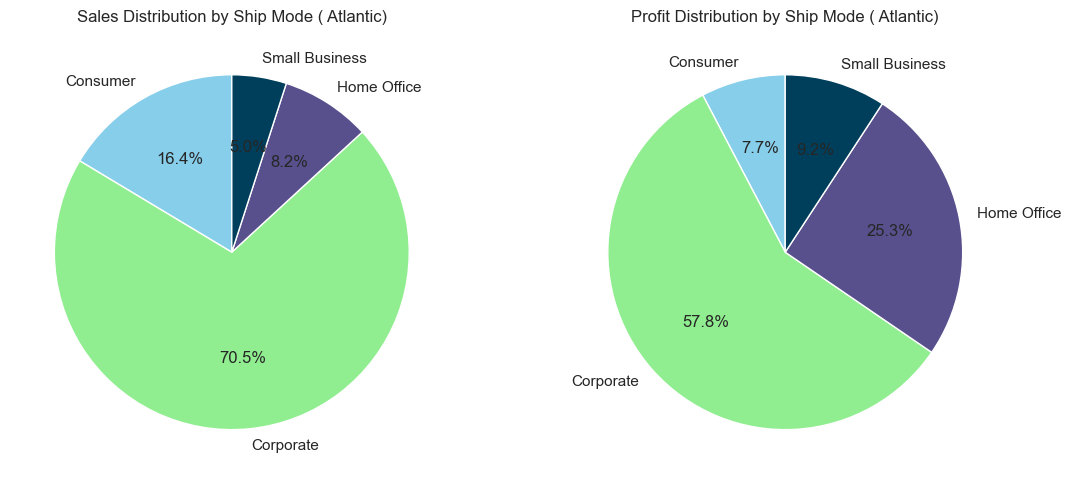

In [849]:

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Pie chart for Sales
axs[0].pie(sales_sum_segment_region[sales_sum_segment_region['Region']==region_input]['Sales'], labels=sales_sum_segment_region[sales_sum_segment_region['Region']==region_input]['Customer_Segment'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen','#58508d','#003f5c'])
axs[0].set_title(f"Sales Distribution by Ship Mode ( {region_input})")

# Pie chart for Profit
axs[1].pie(sales_sum_segment_region[sales_sum_segment_region['Region']==region_input]['Profit'], labels=sales_sum_segment_region[sales_sum_segment_region['Region']==region_input]['Customer_Segment'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen','#58508d','#003f5c'])
axs[1].set_title(f"Profit Distribution by Ship Mode ( {region_input})")

plt.tight_layout()
plt.show()

### The ranking sales (sum) of Customer_Segment in a specific Region (region_iput = 'Atlantic')

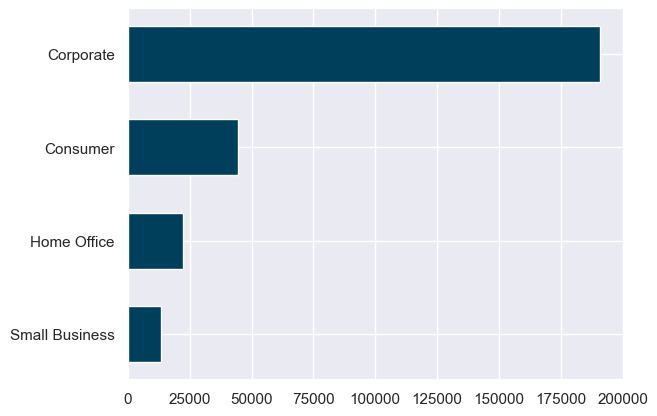

In [850]:
# This shows the ranking sales (sum) of Customer_Segment in a specific Region (region_iput = 'Atlantic')
region_input = 'Atlantic'
x = sales_sum_segment_region[sales_sum_segment_region['Region'] == region_input].sort_values(by = 'Sales')
plt.barh(x.Customer_Segment	,x.Sales, height=0.6 , color = '#003f5c')
plt.gca().spines[['top', 'right', 'bottom', 'left']].set_visible(False)


### The relationship between the Order_Quantity and Profit For a specific Region (region_iput = 'Atlantic')

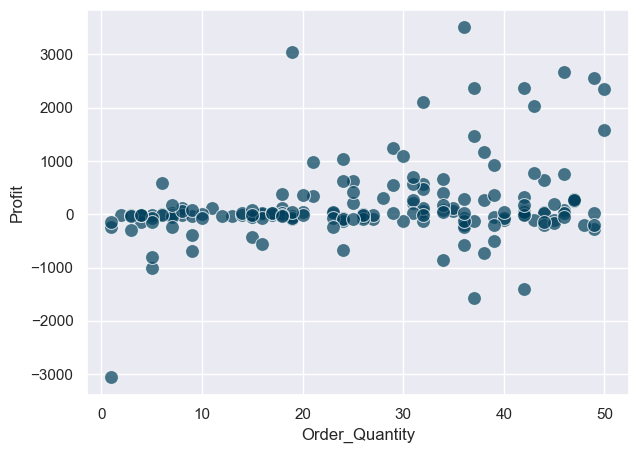

In [851]:
# This shows the relationship between the Order_Quantity and Profit For a specific Region (region_iput = 'Atlantic'
data_indexed = df.loc[(region_input,slice(None),slice(None),slice(None),slice(None),slice(None))]
sns.set(style="darkgrid")
plt.figure(figsize=(7, 5))
sns.scatterplot(y='Profit',x='Order_Quantity' , data=data_indexed, color='#003f5c', alpha=0.7, s=100)
plt.xlabel('Order_Quantity')
plt.ylabel('Profit')

plt.show()

In [852]:
# We grouped the result of sales_sum_segment_region By the region in order to get the total Sales and Profit of each Region
region_sales_sum = sales_sum_segment_region.groupby('Region')[['Sales','Profit']].sum().reset_index()
region_sales_sum.columns = ['Region','Total_Sales','Total_Profit']
region_sales_sum

,Region,Total_Sales,Total_Profit
0,Atlantic,271205.1010,28393.28
1,Northwest Territories,275140.7555,59551.86
2,Nunavut,36306.4980,780.71
3,Ontario,81727.7725,16375.46
4,Prarie,86646.1360,6944.32
5,West,346001.4240,39414.21


In [853]:
# We merged the sales_sum_segment_region and the region_sales_sum, and calculate the Sales Persentage of each Customer_Segment in each Region
sales_percentage_segment = pd.merge(sales_sum_segment_region,region_sales_sum,on='Region',how='left')
sales_percentage_segment['Segment_Sales_%'] = sales_percentage_segment['Sales'] / sales_percentage_segment['Total_Sales'] * 100
# sales_percentage_segment['Segment_Profit_%'] = sales_percentage_segment['Profit'] / sales_percentage_segment['Total_Profit'] * 100
sales_percentage_segment.head()

,Region,Customer_Segment,Sales,Order_Quantity,Profit,Total_Sales,Total_Profit,Segment_Sales_%
0,Atlantic,Consumer,44459.2280,1103,2185.68,271205.1010,28393.28,16.393212
1,Atlantic,Corporate,191065.3360,3091,16399.41,271205.1010,28393.28,70.450495
2,Atlantic,Home Office,22196.9295,159,7191.46,271205.1010,28393.28,8.184555
3,Atlantic,Small Business,13483.6075,155,2616.73,271205.1010,28393.28,4.971738
4,Northwest Territories,Consumer,39093.3445,579,10358.28,275140.7555,59551.86,14.208489


In [854]:
sales_percentage_segment[sales_percentage_segment['Region'] == 'Northwest Territories']

,Region,Customer_Segment,Sales,Order_Quantity,Profit,Total_Sales,Total_Profit,Segment_Sales_%
4,Northwest Territories,Consumer,39093.3445,579,10358.28,275140.7555,59551.86,14.208489
5,Northwest Territories,Corporate,223399.5310,2616,50424.42,275140.7555,59551.86,81.194635
6,Northwest Territories,Home Office,7344.2400,153,1253.39,275140.7555,59551.86,2.669266
7,Northwest Territories,Small Business,5303.6400,226,-2484.23,275140.7555,59551.86,1.927610


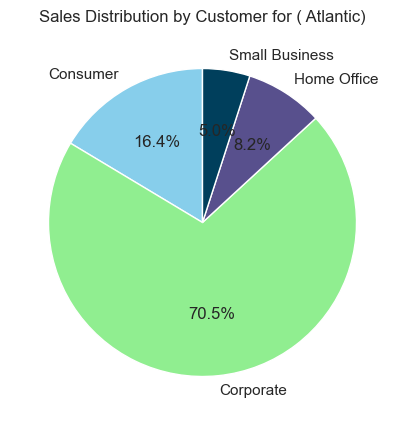

In [855]:
plt.figure(figsize=(5, 5))
plt.pie(sales_percentage_segment[sales_percentage_segment['Region']==region_input]['Segment_Sales_%'], labels=sales_percentage_segment[sales_percentage_segment['Region']==region_input]['Customer_Segment'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen','#58508d','#003f5c'])
plt.title(f"Sales Distribution by Customer for ( {region_input})")
plt.show()

### The Sales Percentage For each Region

In [856]:
# We calculate the Sales Percentage for each Region
sales_percentage_region = region_sales_sum
sales_percentage_region['Region_Sales_%'] = sales_percentage_region['Total_Sales'] / df['Sales'].sum() * 100
# sales_percentage_region['Region_Profit_%'] = sales_percentage_region['Total_Sales'] / df['Profit'].sum() * 100
sales_percentage_region = sales_percentage_region.sort_values(by = 'Region_Sales_%')
sales_percentage_region

,Region,Total_Sales,Total_Profit,Region_Sales_%
2,Nunavut,36306.4980,780.71,3.309533
3,Ontario,81727.7725,16375.46,7.449928
4,Prarie,86646.1360,6944.32,7.898263
0,Atlantic,271205.1010,28393.28,24.721810
1,Northwest Territories,275140.7555,59551.86,25.080566
5,West,346001.4240,39414.21,31.539899


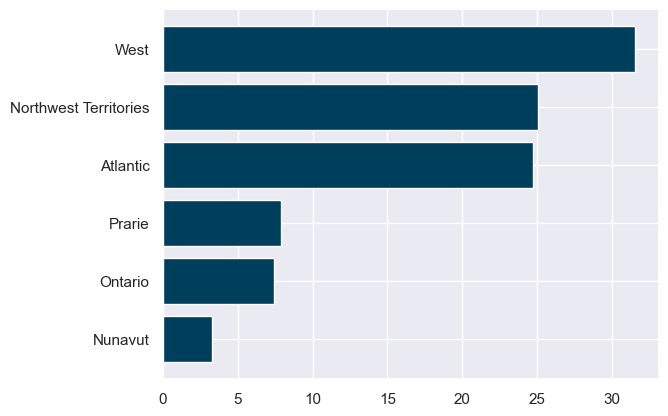

In [857]:
plt.barh(sales_percentage_region['Region'] , sales_percentage_region['Region_Sales_%'], color = '#003f5c')
plt.show()

### The proportion of Sales, Profit for each Product_Categorie of each Customer_Segment in each Region :

In [858]:
Sales_Segment_Category_sum = df.groupby(level= ['Region','Customer_Segment','Product_Category'])[['Sales','Order_Quantity','Profit']].sum().reset_index()
Sales_Segment_Category_sum[Sales_Segment_Category_sum['Region'] == region_input].head()

,Region,Customer_Segment,Product_Category,Sales,Order_Quantity,Profit
0,Atlantic,Consumer,Furniture,3434.940,73,-1517.88
1,Atlantic,Consumer,Office Supplies,31471.110,857,2940.71
2,Atlantic,Consumer,Technology,9553.178,173,762.85
3,Atlantic,Corporate,Furniture,29126.060,551,1501.81
4,Atlantic,Corporate,Office Supplies,42326.520,1663,6481.80


In [859]:
Sales_Region_Category_sum = df.groupby(level= ['Region','Customer_Segment'])[['Sales','Profit']].sum().reset_index()
Sales_Region_Category_sum.columns = ['Region','Customer_Segment','Total_Sales','Total_Profit']
Sales_Region_Category_sum.head()

,Region,Customer_Segment,Total_Sales,Total_Profit
0,Atlantic,Consumer,44459.2280,2185.68
1,Atlantic,Corporate,191065.3360,16399.41
2,Atlantic,Home Office,22196.9295,7191.46
3,Atlantic,Small Business,13483.6075,2616.73
4,Northwest Territories,Consumer,39093.3445,10358.28


In [860]:
Sales_Percentage_Category = pd.merge(Sales_Segment_Category_sum, Sales_Region_Category_sum, on= ['Region','Customer_Segment'], how= 'left')
Sales_Percentage_Category['Category_Sales_%'] = Sales_Percentage_Category['Sales'] / Sales_Percentage_Category['Total_Sales']*100
# Sales_Percentage_Category['Category_Profit_%'] = Sales_Percentage_Category['Profit'] / Sales_Percentage_Category['Total_Profit']*100
Sales_Percentage_Category.head()

,Region,Customer_Segment,Product_Category,Sales,Order_Quantity,Profit,Total_Sales,Total_Profit,Category_Sales_%
0,Atlantic,Consumer,Furniture,3434.940,73,-1517.88,44459.228,2185.68,7.726045
1,Atlantic,Consumer,Office Supplies,31471.110,857,2940.71,44459.228,2185.68,70.786452
2,Atlantic,Consumer,Technology,9553.178,173,762.85,44459.228,2185.68,21.487503
3,Atlantic,Corporate,Furniture,29126.060,551,1501.81,191065.336,16399.41,15.244031
4,Atlantic,Corporate,Office Supplies,42326.520,1663,6481.80,191065.336,16399.41,22.152904


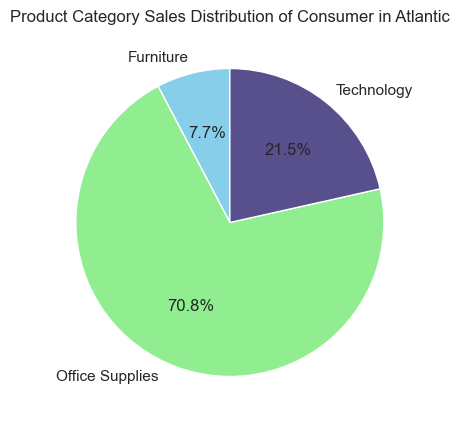

In [861]:
segment_input = 'Consumer'
segment_filtered_data = Sales_Percentage_Category[(Sales_Percentage_Category['Region'] == region_input) & (Sales_Percentage_Category['Customer_Segment'] == segment_input)]

plt.figure(figsize=(5, 5))
plt.pie(segment_filtered_data['Category_Sales_%'], labels=segment_filtered_data['Product_Category'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', '#58508d', '#003f5c'])
plt.title(f"Product Category Sales Distribution of {segment_input} in {region_input}")
plt.show()


### The proportion of Sales, Profit for each Sub_Product_Categorie of each Category 
### and Customer_Segment in each Region :

In [862]:
Sales_Sub_Category_sum = df.groupby(level= ['Region','Customer_Segment','Product_Category','Product_Sub-Category'])[['Sales','Profit']].sum().reset_index()
Sales_Sub_Category_sum.head()

,Region,Customer_Segment,Product_Category,Product_Sub-Category,Sales,Profit
0,Atlantic,Consumer,Furniture,Office Furnishings,678.77,43.84
1,Atlantic,Consumer,Furniture,Tables,2756.17,-1561.72
2,Atlantic,Consumer,Office Supplies,Appliances,8745.71,3580.43
3,Atlantic,Consumer,Office Supplies,Binders And Binder Accessories,2372.20,-201.67
4,Atlantic,Consumer,Office Supplies,Envelopes,92.06,5.66


In [863]:
Sales_Region_Sub_Category_sum = df.groupby(level= ['Region','Customer_Segment','Product_Category'])[['Sales','Profit']].sum().reset_index()
Sales_Region_Sub_Category_sum.columns = ['Region','Customer_Segment','Product_Category','Total_Sales','Total_Profit']
Sales_Region_Sub_Category_sum.head()

,Region,Customer_Segment,Product_Category,Total_Sales,Total_Profit
0,Atlantic,Consumer,Furniture,3434.940,-1517.88
1,Atlantic,Consumer,Office Supplies,31471.110,2940.71
2,Atlantic,Consumer,Technology,9553.178,762.85
3,Atlantic,Corporate,Furniture,29126.060,1501.81
4,Atlantic,Corporate,Office Supplies,42326.520,6481.80


In [864]:
Sales_Percentage_Sub_Category = pd.merge(Sales_Sub_Category_sum, Sales_Region_Sub_Category_sum, on= ['Region','Customer_Segment','Product_Category'], how= 'left')
Sales_Percentage_Sub_Category['Category_Sales_%'] = Sales_Percentage_Sub_Category['Sales'] / Sales_Percentage_Sub_Category['Total_Sales']*100
# Sales_Percentage_Sub_Category['Category_Profit_%'] = Sales_Percentage_Category['Profit'] / Sales_Percentage_Category['Total_Profit']*100
Sales_Percentage_Sub_Category.head()

,Region,Customer_Segment,Product_Category,Product_Sub-Category,Sales,Profit,Total_Sales,Total_Profit,Category_Sales_%
0,Atlantic,Consumer,Furniture,Office Furnishings,678.77,43.84,3434.94,-1517.88,19.760753
1,Atlantic,Consumer,Furniture,Tables,2756.17,-1561.72,3434.94,-1517.88,80.239247
2,Atlantic,Consumer,Office Supplies,Appliances,8745.71,3580.43,31471.11,2940.71,27.789646
3,Atlantic,Consumer,Office Supplies,Binders And Binder Accessories,2372.20,-201.67,31471.11,2940.71,7.537707
4,Atlantic,Consumer,Office Supplies,Envelopes,92.06,5.66,31471.11,2940.71,0.292522


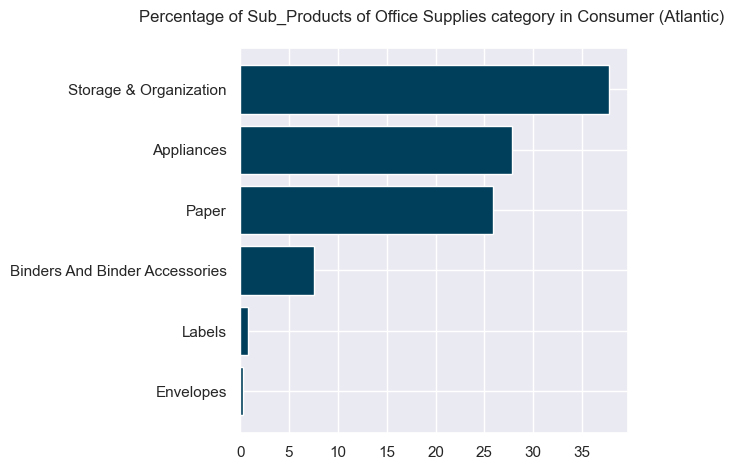

In [865]:
category_input = 'Office Supplies'
sub_category_filtered_data = Sales_Percentage_Sub_Category[(Sales_Percentage_Sub_Category['Region'] == region_input) & (Sales_Percentage_Sub_Category['Customer_Segment'] == segment_input) & (Sales_Percentage_Sub_Category['Product_Category'] == category_input)]
sub_category_filtered_data = sub_category_filtered_data.sort_values(by='Category_Sales_%')
plt.figure(figsize=(5,5))
# plt.pie(sub_category_filtered_data['Category_Sales_%'] , labels= sub_category_filtered_data['Product_Sub-Category'] , autopct='%1.1f%%' , startangle= 90 , colors= ['skyblue', 'lightgreen', '#58508d', '#003f5c'])
# plt.title(f"Percentage of Sub_Products of {category_input} category in {segment_input} ({region_input})")
# plt.show()
plt.barh(sub_category_filtered_data['Product_Sub-Category'],sub_category_filtered_data['Category_Sales_%'],color = '#003f5c')
plt.title(f"Percentage of Sub_Products of {category_input} category in {segment_input} ({region_input}) \n")
plt.show()

### The proportion of Sales, Profit for each Order_Priority in each Region :

In [866]:
Sales_Priority_Category_sum = df.groupby(level= ['Region','Order_Priority'])[['Sales','Profit']].sum().reset_index()
Sales_Priority_Category_sum.head()

,Region,Order_Priority,Sales,Profit
0,Atlantic,Critical,44583.3090,5165.79
1,Atlantic,High,54540.2405,3876.14
2,Atlantic,Low,87004.2010,10704.60
3,Atlantic,Medium,40393.6275,5945.94
4,Atlantic,Not Specified,44683.7230,2700.81


In [867]:
sales_percentage_Priority = pd.merge(Sales_Priority_Category_sum,region_sales_sum,on='Region',how='left')
sales_percentage_Priority['Priority_Sales_%'] = sales_percentage_Priority['Sales'] / sales_percentage_Priority['Total_Sales'] * 100
# sales_percentage_segment['Segment_Profit_%'] = sales_percentage_segment['Profit'] / sales_percentage_segment['Total_Profit'] * 100
sales_percentage_Priority.head(6)

,Region,Order_Priority,Sales,Profit,Total_Sales,Total_Profit,Region_Sales_%,Priority_Sales_%
0,Atlantic,Critical,44583.3090,5165.79,271205.1010,28393.28,24.721810,16.438964
1,Atlantic,High,54540.2405,3876.14,271205.1010,28393.28,24.721810,20.110330
2,Atlantic,Low,87004.2010,10704.60,271205.1010,28393.28,24.721810,32.080592
3,Atlantic,Medium,40393.6275,5945.94,271205.1010,28393.28,24.721810,14.894125
4,Atlantic,Not Specified,44683.7230,2700.81,271205.1010,28393.28,24.721810,16.475989
5,Northwest Territories,Critical,60128.0135,10450.28,275140.7555,59551.86,25.080566,21.853547


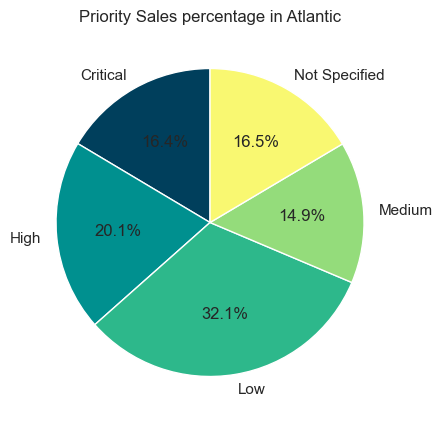

In [868]:
priority_filter_data = sales_percentage_Priority[sales_percentage_Priority['Region'] == region_input]
priority_filter_data
plt.figure(figsize = (5,5))
plt.pie(priority_filter_data['Priority_Sales_%'] , labels= priority_filter_data['Order_Priority'] , autopct= '%1.1f%%' , startangle= 90 , colors = ['#003F5C','#00908F','#2DB88B','#94DC7B','#F9F871'])
plt.title(f"Priority Sales percentage in {region_input}")
plt.show()

In [869]:
df.groupby(level= 'Product_Category')['Sales'].mean().reset_index().sort_values(by = 'Sales',ascending = False)

,Product_Category,Sales
2,Technology,3036.085443
0,Furniture,1549.117755
1,Office Supplies,858.027606


In [870]:
df.index.names

FrozenList(['Region', 'Customer_Segment', 'Product_Category', 'Product_Sub-Category', 'Order_Priority', 'Order_ID', 'Ship_Mode'])

In [891]:
loyel = df.groupby(level= 'Order_ID').count().reset_index().sort_values(by = 'Order_Quantity',ascending=False)
loyel['Frequence'] = loyel.Sales
loyel = loyel.drop(['Sales','Profit','Product_Name','Order_Quantity','Product_Container','Customer_Name'],axis = 1) 
customer_info = df.groupby(level= 'Order_ID')[['Order_Quantity','Sales','Profit']].agg(
    {
        'Order_Quantity' : 'sum',
        'Sales' : 'mean',
        'Profit' : 'mean'
    }
)

loyel = pd.merge(loyel,customer_info,on = 'Order_ID',how  = 'left').drop_duplicates()
loyel
# loyel['Customer_Name'] = df[df['C
# df['Customer_Name'].reset_index()

,Order_ID,Frequence,Order_Quantity,Sales,Profit
0,24132,6,118,362.303333,21.068333
1,8995,4,123,987.822500,119.172500
2,47846,4,117,2123.892500,521.097500
3,36803,3,46,81.258333,-91.610000
4,48452,3,78,679.946667,-61.970000
...,...,...,...,...,...
566,22053,1,32,563.080000,112.970000
567,21892,1,6,34.880000,-18.340000
568,21856,1,47,168.550000,71.770000
569,21509,1,13,47.930000,15.820000
